In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, Dropout, concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
# 读取相关数据
save_dir = 'drive/MyDrive/Colab Notebooks/data_512/'

train_images = np.load(os.path.join(save_dir, 'train_images.npy'))
train_masks = np.load(os.path.join(save_dir, 'train_masks.npy'))
valid_images = np.load(os.path.join(save_dir, 'valid_images.npy'))
valid_masks = np.load(os.path.join(save_dir, 'valid_masks.npy'))


# 定义 U-Net v2 模型
def unet_v2_model(input_size=(512, 512, 3), num_classes=4):
    inputs = Input(input_size)

    # 下采样部分
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # 底部
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # 上采样部分
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# 编译 U-Net v2 模型
model = unet_v2_model()
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(train_images, train_masks, validation_data=(valid_images, valid_masks), epochs=50, batch_size=8)

# 保存模型
model.save('drive/MyDrive/Colab Notebooks/UNETv2_model.keras')


Epoch 1/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 203s 337ms/step - accuracy: 0.8593 - loss: 0.3990 - val_accuracy: 0.8407 - val_loss: 0.5909
Epoch 2/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 74s 186ms/step - accuracy: 0.9050 - loss: 0.2664 - val_accuracy: 0.9160 - val_loss: 0.2392
Epoch 3/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 74s 186ms/step - accuracy: 0.9142 - loss: 0.2423 - val_accuracy: 0.9313 - val_loss: 0.1934
Epoch 4/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 74s 187ms/step - accuracy: 0.9197 - loss: 0.2303 - val_accuracy: 0.9341 - val_loss: 0.2210
Epoch 5/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 74s 187ms/step - accuracy: 0.9300 - loss: 0.2009 - val_accuracy: 0.9430 - val_loss: 0.1678
Epoch 6/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 74s 186ms/step - accuracy: 0.9336 - loss: 0.1906 - val_accuracy: 0.9436 - val_loss: 0.1661
Epoch 7/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 74s 187ms/step - accuracy: 0.9443 - loss: 0.1630 - val_accuracy: 0.9393 - val_loss: 0.1833
Epoch 8/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 74s 187ms/step - accuracy: 0.9506 - loss: 

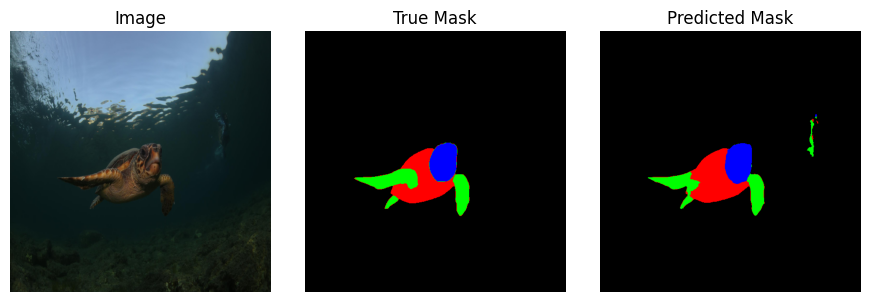


Image 1:	
Class 1 IoU: 0.7262	Class 2 IoU: 0.6342	Class 3 IoU: 0.9344	

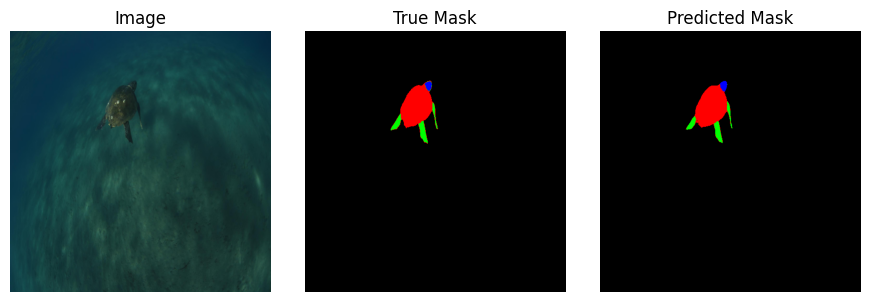


Image 2:	
Class 1 IoU: 0.9339	Class 2 IoU: 0.8510	Class 3 IoU: 0.8148	

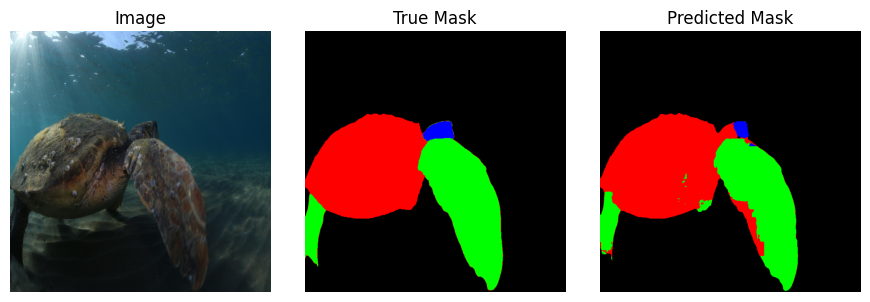


Image 3:	
Class 1 IoU: 0.8954	Class 2 IoU: 0.8855	Class 3 IoU: 0.4337	

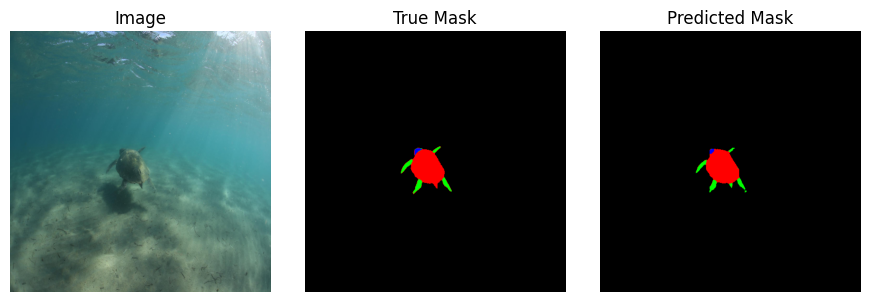


Image 4:	
Class 1 IoU: 0.9181	Class 2 IoU: 0.7497	Class 3 IoU: 0.6263	

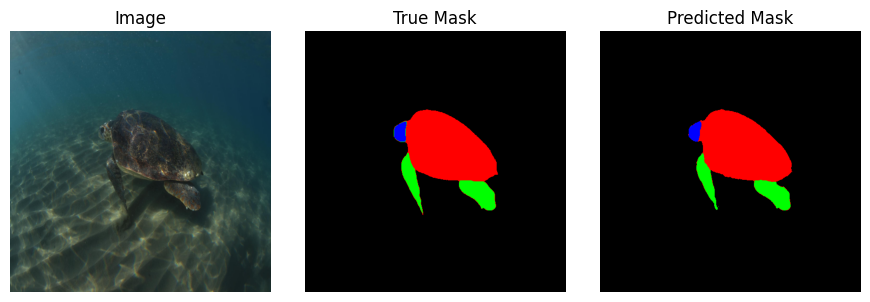


Image 5:	
Class 1 IoU: 0.9691	Class 2 IoU: 0.9239	Class 3 IoU: 0.8862	

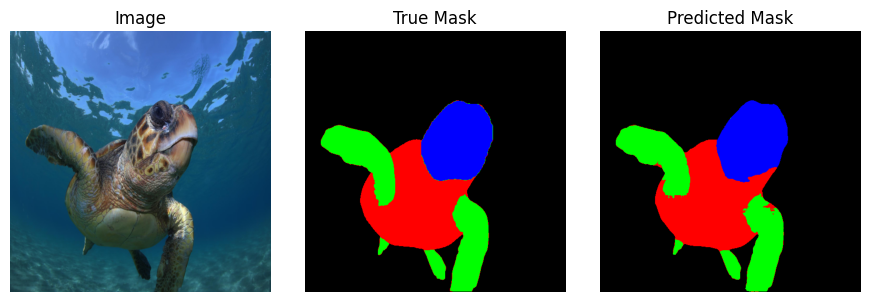


Image 6:	
Class 1 IoU: 0.8870	Class 2 IoU: 0.9057	Class 3 IoU: 0.9420	

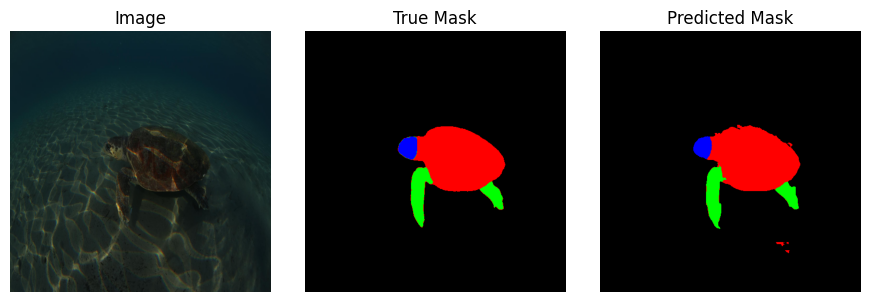


Image 7:	
Class 1 IoU: 0.9401	Class 2 IoU: 0.8780	Class 3 IoU: 0.9115	

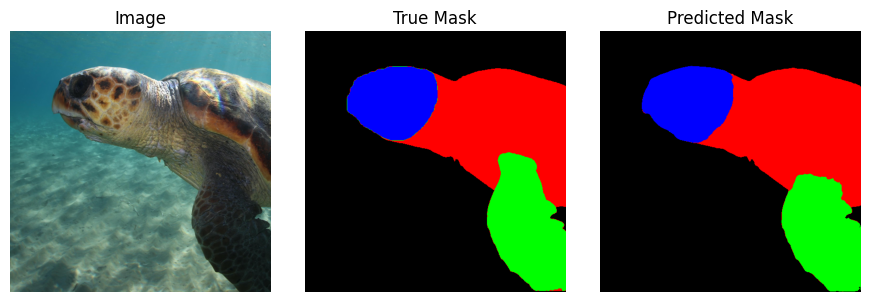


Image 8:	
Class 1 IoU: 0.9209	Class 2 IoU: 0.8695	Class 3 IoU: 0.9601	

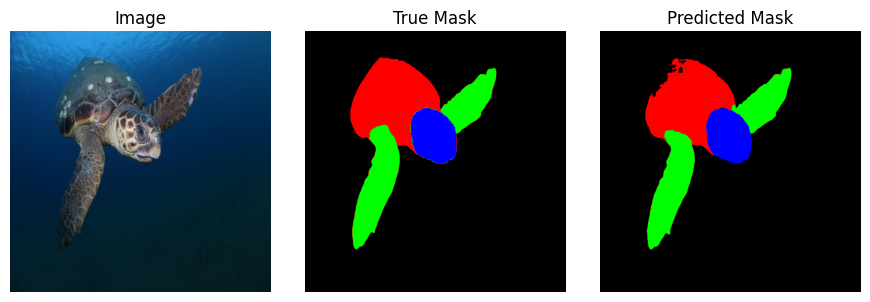


Image 9:	
Class 1 IoU: 0.8865	Class 2 IoU: 0.9543	Class 3 IoU: 0.9718	

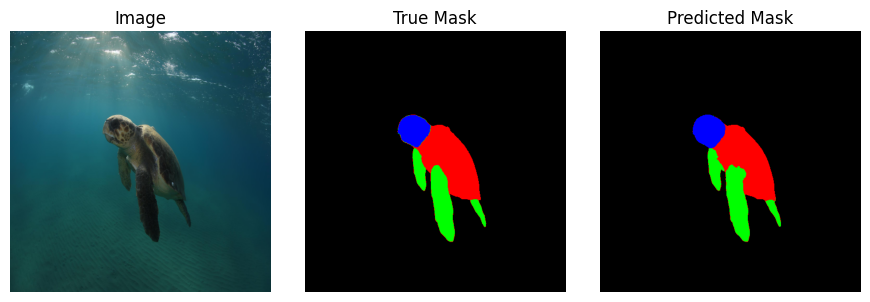


Image 10:	
Class 1 IoU: 0.9151	Class 2 IoU: 0.9030	Class 3 IoU: 0.9256	


Class 1 mIoU: 0.8644	Class 2 mIoU: 0.7635	Class 3 mIoU: 0.7453	
Overall mIoU across all classes: 0.7911


In [3]:
# 读取相关数据与模型
save_dir = 'drive/MyDrive/Colab Notebooks/data_512/'
test_images = np.load(os.path.join(save_dir, 'test_images.npy'))
test_masks = np.load(os.path.join(save_dir, 'test_masks.npy'))
model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/UNETv2_model.keras')

# 可视化预测结果
def visualize_fcn_results(image, mask_true, mask_pred):
    # NumPy数组转换为PIL Image对象
    image = Image.fromarray(image.astype(np.uint8)).resize((512, 512))

    # 创建彩色掩码
    mask_true_colored = np.zeros((512, 512, 3), dtype=np.uint8)
    mask_pred_colored = np.zeros((512, 512, 3), dtype=np.uint8)

    # 颜色字典，每个类别分配一个不同的颜色
    colors = {
        0: (0, 0, 0),       # 背景，黑色
        1: (255, 0, 0),     # 类别1，红色
        2: (0, 255, 0),     # 类别2，绿色
        3: (0, 0, 255),     # 类别3，蓝色
    }

    # 为每个类别分配颜色
    mask_true = mask_true.reshape((512, 512))
    mask_pred = np.argmax(mask_pred, axis=-1).reshape((512, 512))

    for class_id, color in colors.items():
        mask_true_colored[mask_true == class_id] = color
        mask_pred_colored[mask_pred == class_id] = color

    # 可视化
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(mask_true_colored)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(mask_pred_colored)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 为指定类别计算IoU
def calculate_iou(true_mask, pred_mask, class_id):
    true_class = (true_mask == class_id)
    pred_class = (pred_mask == class_id)
    intersection = np.logical_and(true_class, pred_class).sum()
    union = np.logical_or(true_class, pred_class).sum()

    if union == 0:
        return np.nan  # 避免分母为零的情况
    else:
        return intersection / union

if len(test_images) > 0 and len(test_masks) > 0:
    num_visualize = 10  # 可视化图像数量
    for i in range(num_visualize):
        sample_image = test_images[i]
        sample_mask = test_masks[i]
        sample_prediction = model.predict(np.expand_dims(sample_image, axis=0), verbose=0)[0]
        visualize_fcn_results(sample_image, sample_mask, sample_prediction)

        # 计算每类的IoU
        pred_mask = np.argmax(sample_prediction, axis=-1).reshape((512, 512))
        true_mask = sample_mask.reshape((512, 512))

        print(f"\nImage {i + 1}:\t")
        for class_id in range(1, 4):  # 从1开始，因为0是背景
            iou = calculate_iou(true_mask, pred_mask, class_id)
            if not np.isnan(iou):
                print(f"Class {class_id} IoU: {iou:.4f}", end = '\t')
            else:
                print(f"Class {class_id} IoU: NaN (no instances in true mask)", end = '\t')


# 计算并打印每个类的mIoU
def evaluate_miou(test_images, test_masks, model, num_classes=4):
    ious_per_class = {i: [] for i in range(1, num_classes)}  # 存储每类的IoU

    for i in range(len(test_images)):
        sample_image = test_images[i]
        sample_mask = test_masks[i]
        sample_prediction = model.predict(np.expand_dims(sample_image, axis=0), verbose=0)[0]
        pred_mask = np.argmax(sample_prediction, axis=-1).reshape((512, 512))
        true_mask = sample_mask.reshape((512, 512))

        # 对每个类别计算IoU
        for class_id in range(1, num_classes):  # 从1开始，因为0是背景
            iou = calculate_iou(true_mask, pred_mask, class_id)
            if not np.isnan(iou):  # 只添加有效的IoU
                ious_per_class[class_id].append(iou)

    # 计算每个类的mIoU
    mean_ious = {}
    print("\n\n")
    for class_id, ious in ious_per_class.items():
        mean_ious[class_id] = np.nanmean(ious) if ious else np.nan  # 忽略NaN
        print(f"Class {class_id} mIoU: {mean_ious[class_id]:.4f}", end = '\t')

    # 计算并输出整体mIoU
    overall_miou = np.nanmean(list(mean_ious.values()))
    print(f"\nOverall mIoU across all classes: {overall_miou:.4f}")
    return mean_ious, overall_miou

# 并计算每类的mIoU
if len(test_images) > 0 and len(test_masks) > 0:
    mean_ious, overall_miou = evaluate_miou(test_images, test_masks, model)